In [ ]:
#made by Vishal Sharma(22.03.2019)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

In [3]:
file = r'C:\Users\hp\Desktop\vgsales.csv'
vg = pd.read_csv(file)
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
vg.shape

(16598, 11)

In [12]:
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
# marking pokemon games
vg["Pokemon"]=[True if each.startswith("Pokemon") else False for each in vg.Name]#creating new column
vg1=vg[vg.Pokemon]#pokemon games' data

In [15]:
vg1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Pokemon
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,True
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,True
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,True
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,True
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,True


In [17]:
best=vg1.nlargest(5,'Global_Sales')#best 5 pokemon games
best

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Pokemon
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,True
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,True
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,True
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,True
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,True


Text(0.5, 1.0, 'Best 5 Pokemon Games Sales')

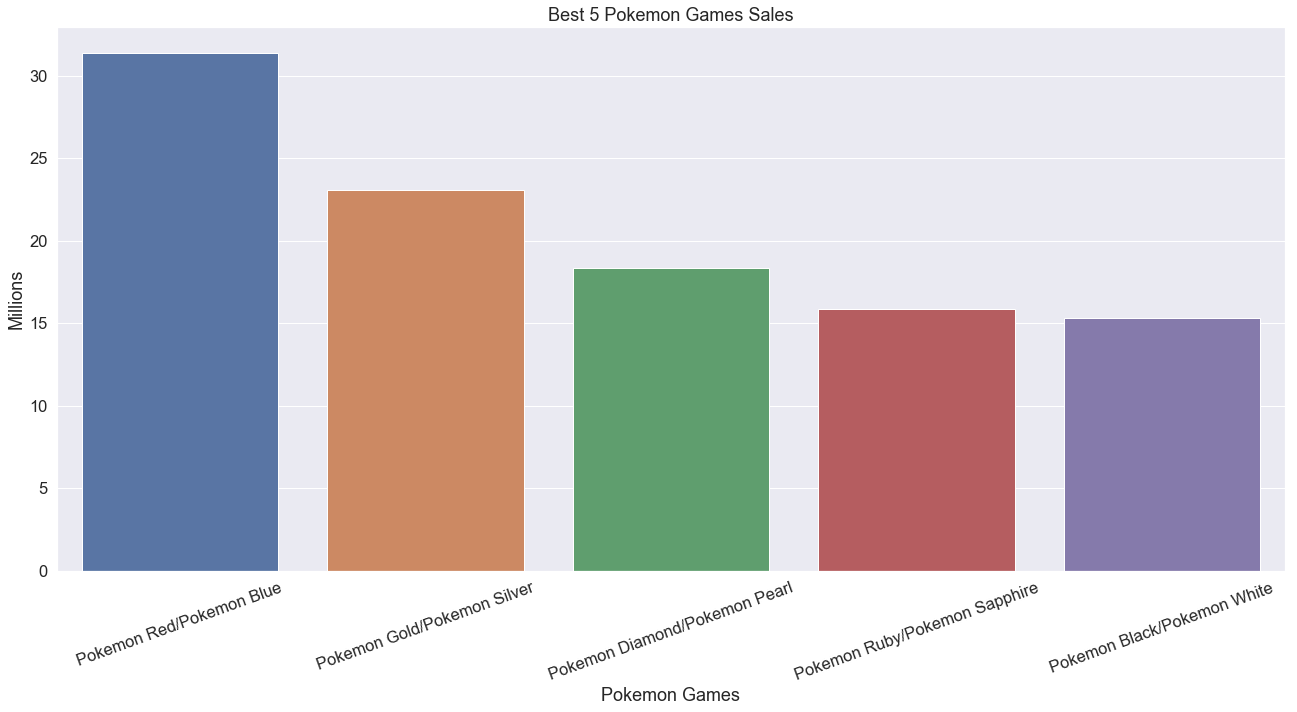

In [18]:
sns.set(font_scale=1.5)
plt.figure(figsize=(22,10))
sns.barplot(x=best.Name, y=best.Global_Sales)
plt.xticks(rotation= 20)
plt.xlabel('Pokemon Games')
plt.ylabel('Millions')
plt.title('Best 5 Pokemon Games Sales')

In [20]:
len(vg["Publisher"].unique())

579

In [22]:
rpgames=vg[vg["Genre"]=="Role-Playing"]#only role playing game data
publisher=list(rpgames["Publisher"].unique())# and its publishers

rpg_publishers=[]
rpg_sales=[]

for i in publisher:
    x=rpgames[rpgames["Publisher"]==i]
    if len(x)!=0:
        sales_ratio=sum(x["Global_Sales"])/len(x)
        rpg_sales.append(sales_ratio)
        rpg_publishers.append(i)#Maybe no need

In [23]:
rpgData=pd.DataFrame({"Publisher":rpg_publishers, "Sales":rpg_sales})#converting dataframe
sorting=rpgData.nlargest(30,'Sales')#selecting best 30 rpg sales ratio

Text(0.5, 1.0, 'Mean of RPG Sales in The World')

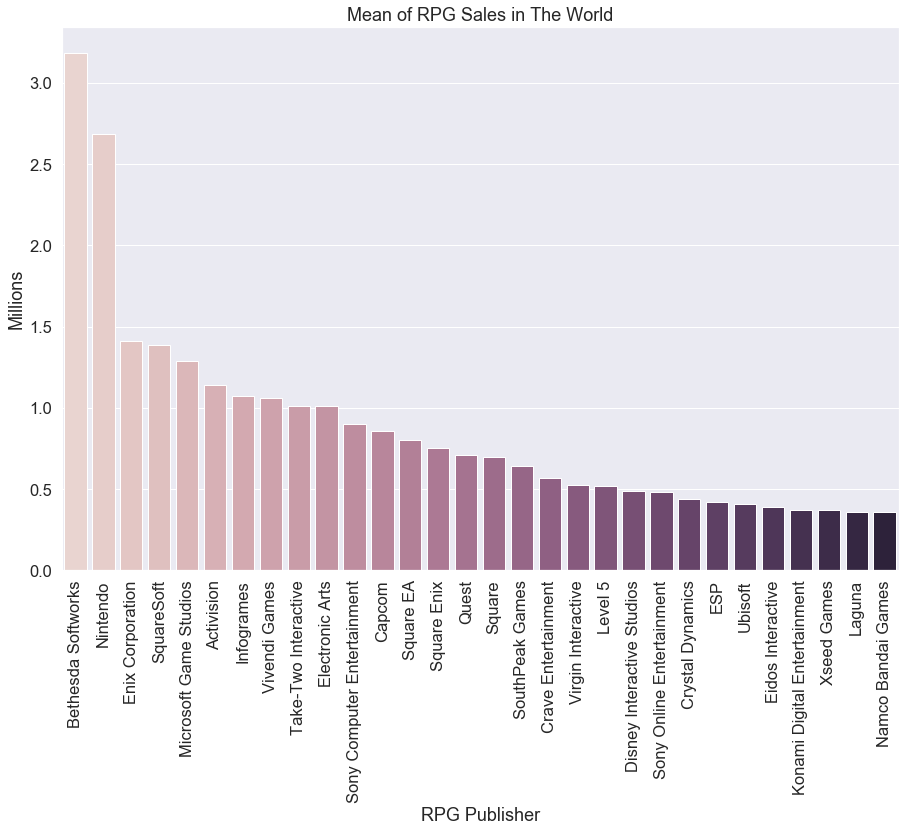

In [24]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorting.Publisher, y=sorting.Sales,palette = sns.cubehelix_palette(len(sorting)))
plt.xticks(rotation= 90)
plt.xlabel('RPG Publisher')
plt.ylabel('Millions')
plt.title('Mean of RPG Sales in The World')

In [25]:
#Game Sales for platform
platforms=list(vg["Platform"].unique())
str(platforms)
na=[]
ua=[]
jp=[]
other=[]
glbl=[]

for i in platforms:
    x=vg[vg["Platform"]==i]
    
    na.append(sum(x["NA_Sales"]))
    ua.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
valuablePlatform=pd.DataFrame({"Platform":platforms, "NA":na, "UA":ua, "JP":jp, "Other":other, "Global":glbl})

In [26]:
valuablePlatform.head()

,Platform,NA,UA,JP,Other,Global
0,Wii,507.71,268.38,69.35,80.61,926.71
1,NES,125.94,21.15,98.65,5.31,251.07
2,GB,114.32,47.82,85.12,8.20,255.45
3,DS,390.71,194.65,175.57,60.53,822.49
4,X360,601.05,280.58,12.43,85.54,979.96


In [27]:
valuablePlatform.tail()

,Platform,NA,UA,JP,Other,Global
26,NG,0.0,0.0,1.44,0.0,1.44
27,TG16,0.0,0.0,0.16,0.0,0.16
28,3DO,0.0,0.0,0.10,0.0,0.10
29,GG,0.0,0.0,0.04,0.0,0.04
30,PCFX,0.0,0.0,0.03,0.0,0.03


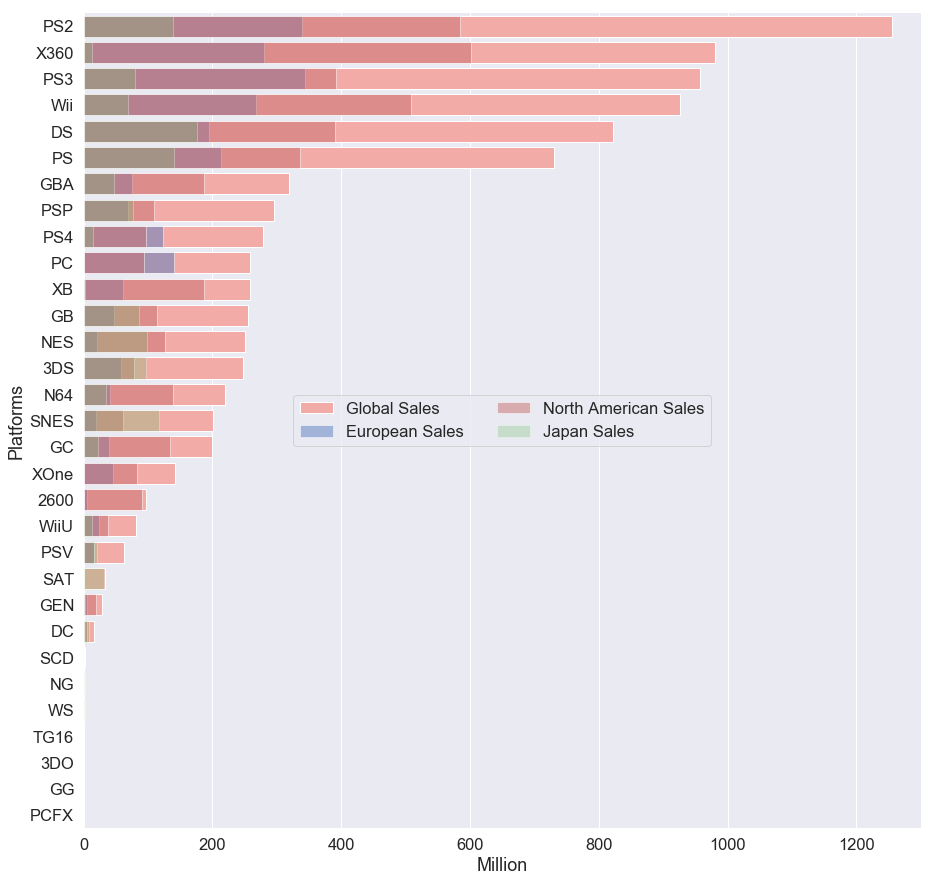

In [28]:
f, ax = plt.subplots(figsize=(15, 15))

sortedData =valuablePlatform.sort_values("Global", ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x="Global", y="Platform", data=sortedData, label="Global Sales", color="r")

sns.set_color_codes("muted")
sns.barplot(x="UA", y="Platform", data=sortedData, label="European Sales", color="b",alpha=0.5)

sns.set_color_codes("muted")
sns.barplot(x="NA", y="Platform", data=sortedData, label="North American Sales", color="r",alpha=0.5)

sns.set_color_codes("muted")
sns.barplot(x="JP", y="Platform", data=sortedData, label="Japan Sales", color="g",alpha=0.3)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="center", frameon=True)
ax.set(xlim=(0, 1300), ylabel="Platforms", xlabel="Million")
sns.despine(left=True, bottom=True)

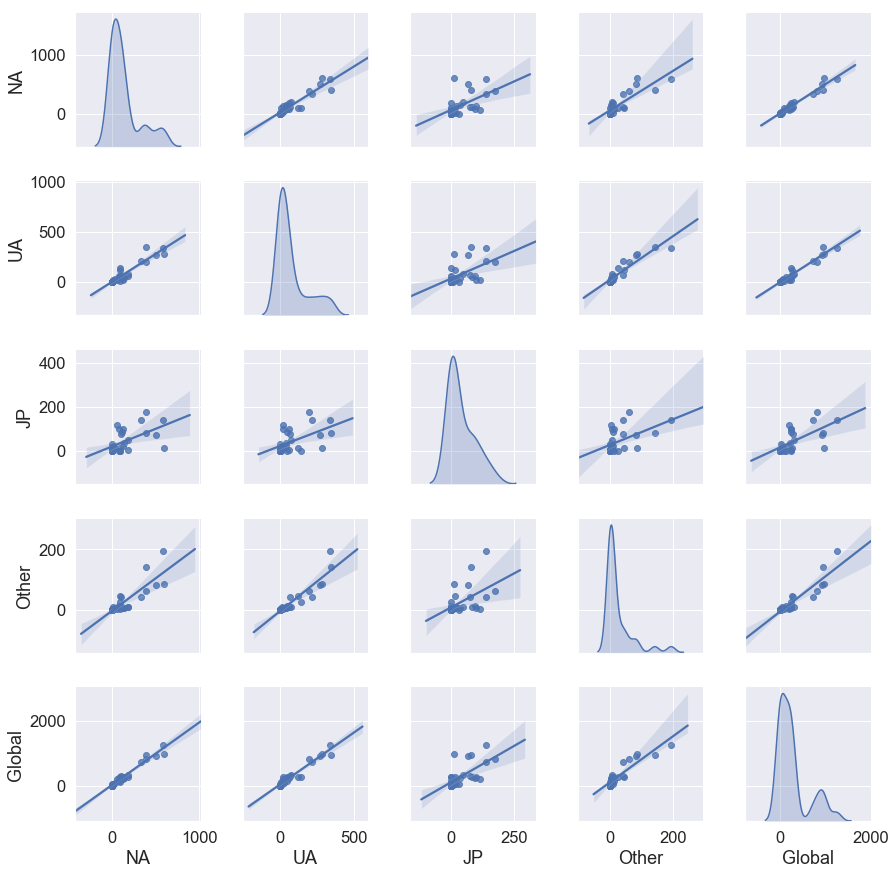

In [30]:
sns.pairplot(valuablePlatform,diag_kind="kde",kind="reg",palette="husl")


In [32]:
dataYear=vg["Year"].dropna().unique()#cleaning data
dataYear.sort()


In [34]:
na=[]
eu=[]
jp=[]
other=[]
glbl=[]

for i in dataYear:
    x=vg[vg["Year"]==i]
    
    na.append(sum(x["NA_Sales"]))
    eu.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
yearSales=pd.DataFrame({"Year":dataYear, "NA":na, "EU":eu, "JP":jp, "Other":other, "Global":glbl})
yearSales["Year"].astype("int64")
yearSales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
Year      39 non-null float64
NA        39 non-null float64
EU        39 non-null float64
JP        39 non-null float64
Other     39 non-null float64
Global    39 non-null float64
dtypes: float64(6)
memory usage: 1.9 KB


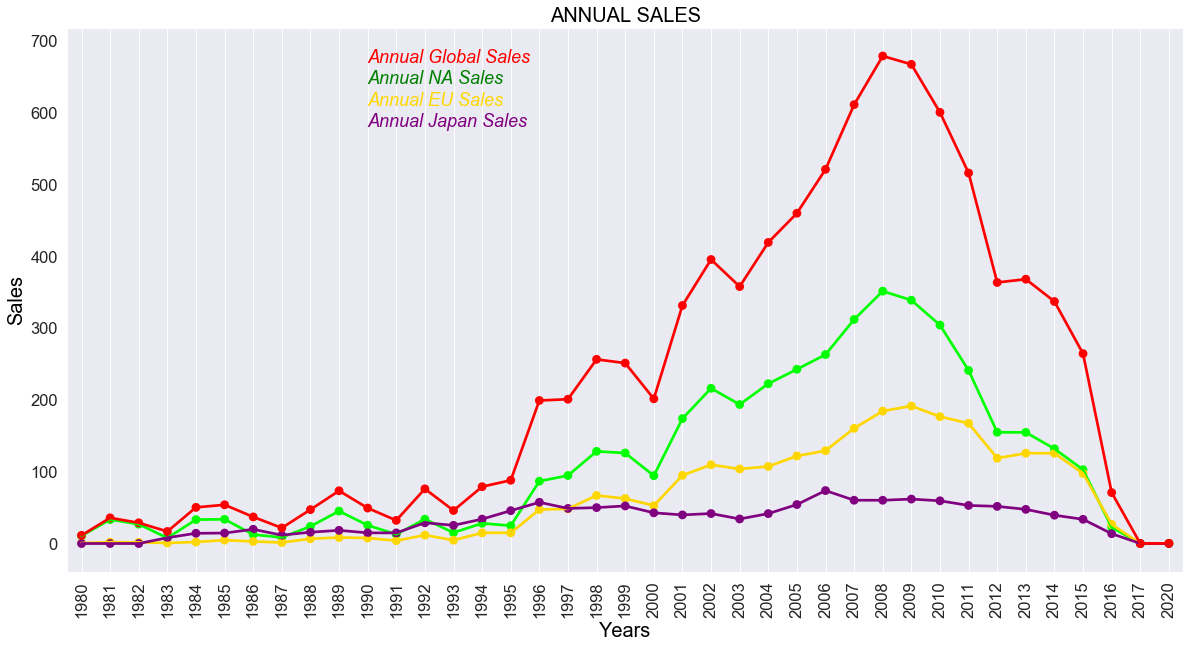

In [39]:
yearSales["Year"]=yearSales.Year.astype("int64")

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="Year",y="NA" ,data=yearSales,color='lime',alpha=0.8)
sns.pointplot(x="Year",y="EU",data=yearSales,color='gold',alpha=0.8)
sns.pointplot(x="Year",y="JP",data=yearSales,color='purple',alpha=0.8)
sns.pointplot(x="Year",y="Global",data=yearSales,color='red',alpha=0.8)
plt.text(10,670,'Annual Global Sales',color='red',fontsize = 18,style = 'italic')
plt.text(10,640,'Annual NA Sales',color='green',fontsize = 18,style = 'italic')
plt.text(10,610,'Annual EU Sales',color='gold',fontsize = 18,style = 'italic')
plt.text(10,580,'Annual Japan Sales',color='purple',fontsize = 18,style = 'italic')
plt.xticks(rotation=90)
plt.xlabel('Years',fontsize = 20,color='black')
plt.ylabel('Sales',fontsize = 20,color='black')
plt.title('ANNUAL SALES',fontsize = 20,color='black')
plt.grid()

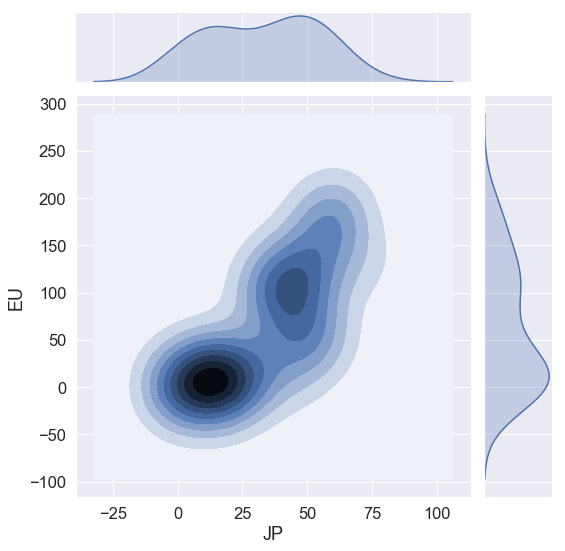

In [42]:
g=sns.jointplot(yearSales.JP,yearSales.EU, kind="kde",height=8)
plt.savefig("graph.png")
plt.show()

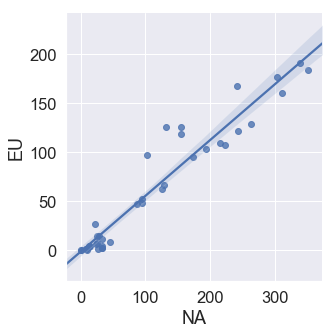

In [43]:
sns.lmplot(x="NA",y="EU", data=yearSales)
plt.show()

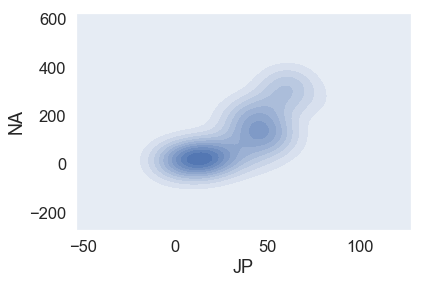

In [44]:
sns.kdeplot(yearSales.JP,yearSales.NA,shade=True,cut=5)

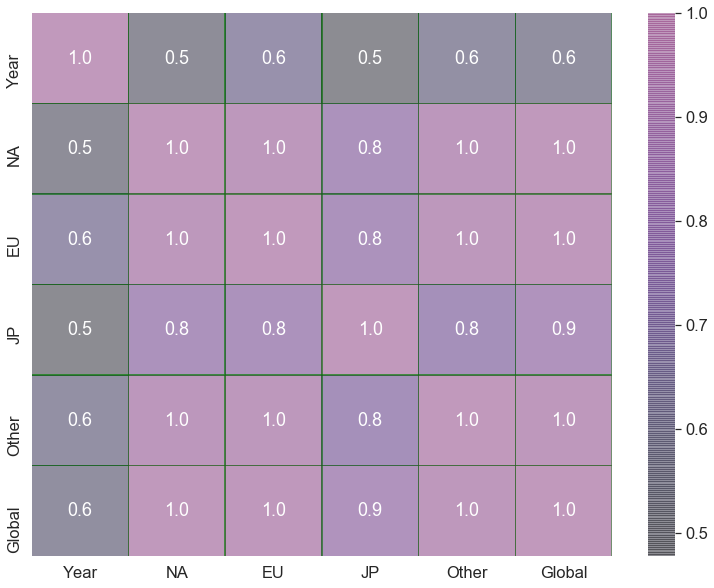

In [48]:
f,ax2=plt.subplots(figsize=(13,10))
sns.heatmap(yearSales.corr(),annot=True,linecolor="green", linewidths=.5,center=1.2, fmt=".1f",ax=ax2,cmap = 'inferno',alpha = 0.4)
plt.show()

Text(0.5, 1.0, 'Global Sales')

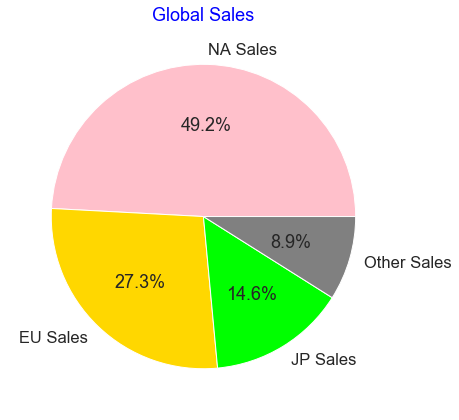

In [52]:
sales=[sum(yearSales["NA"]),sum(yearSales["EU"]),sum(yearSales["JP"]),sum(yearSales["Other"])]
explode=[0,0,0,0]
labels=["NA Sales","EU Sales","JP Sales","Other Sales"]
colors=["pink","gold","lime","gray"]

plt.figure(figsize=(7,7))
plt.pie(sales, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Global Sales", color="blue",fontsize=18)

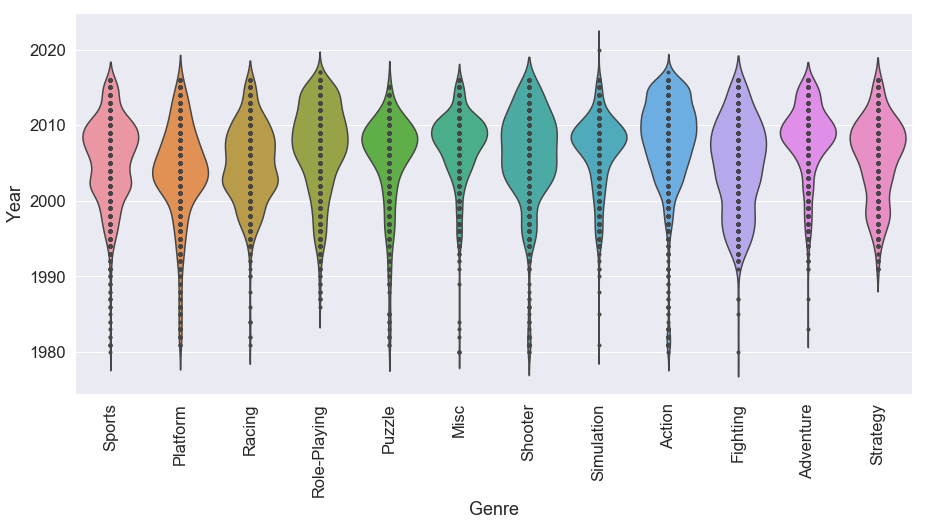

In [54]:
f,ax2=plt.subplots(figsize=(15,7))
sns.violinplot(x="Genre",y="Year", data=vg, inner="points", scale="width")
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

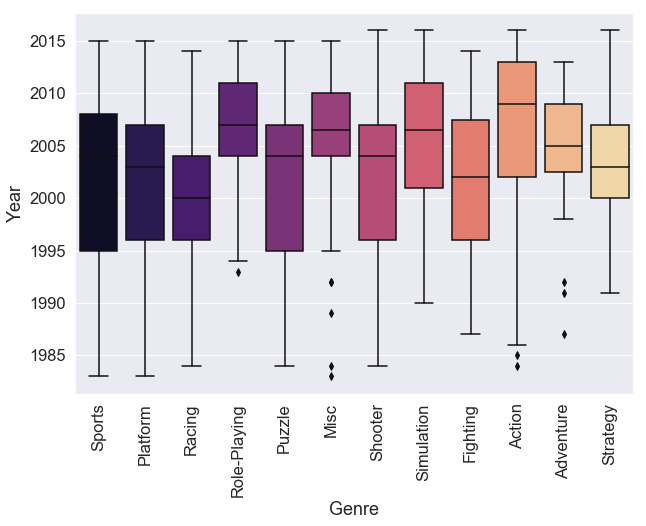

In [57]:
f,ax2=plt.subplots(figsize=(10,7))
data_nintendo=vg[vg["Publisher"]=="Nintendo"]
sns.boxplot(x="Genre",y="Year",data=data_nintendo,palette="magma")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Genres of Nintendo Games')

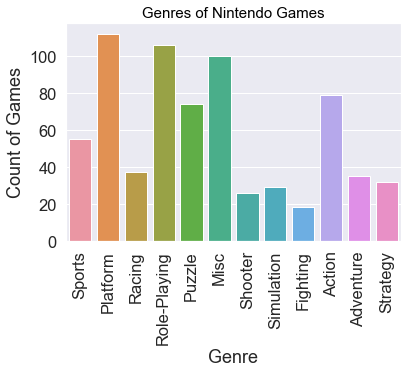

In [58]:
sns.countplot(data_nintendo.Genre)
plt.xticks(rotation=90)
plt.ylabel("Count of Games")
plt.title("Genres of Nintendo Games",color="black",fontsize=15)